# Library Import and Data Loading

In [2]:
import matrixprofile as mp

In [3]:
import warnings

In [4]:
from matplotlib import pyplot as plt

In [9]:
%matplotlib inline

In [6]:
dataset = mp.datasets.load('nyc-taxi-anomalies.csv')

In [13]:
str(dataset)

"{'name': 'nyc-taxi-anomalies.csv', 'category': 'real', 'description': 'Taxi passenger frequency from 2014-07-01 to 2015-01-31. The sample frequency is every 30 minutes consisting of 10,320 data points.', 'data': array([10844.,  8127.,  6210., ..., 27309., 26591., 26288.]), 'datetime': array(['2014-07-01T00:00:00', '2014-07-01T00:30:00',\n       '2014-07-01T01:00:00', ..., '2015-01-31T22:30:00',\n       '2015-01-31T23:00:00', '2015-01-31T23:30:00'],\n      dtype='datetime64[s]')}"

# Visualize Data

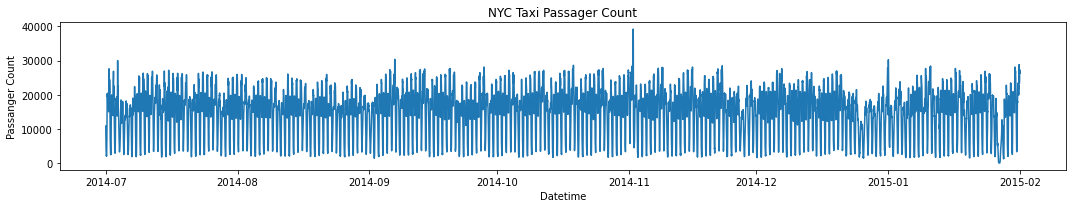

In [25]:
plt.figure(figsize=(15,3))
plt.plot(dataset['datetime'], dataset['data'])
plt.title('NYC Taxi Passager Count')
plt.ylabel('Passanger Count')
plt.xlabel('Datetime')
plt.tight_layout()
#plt.savefig('fig.png', bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matrixprofile\visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


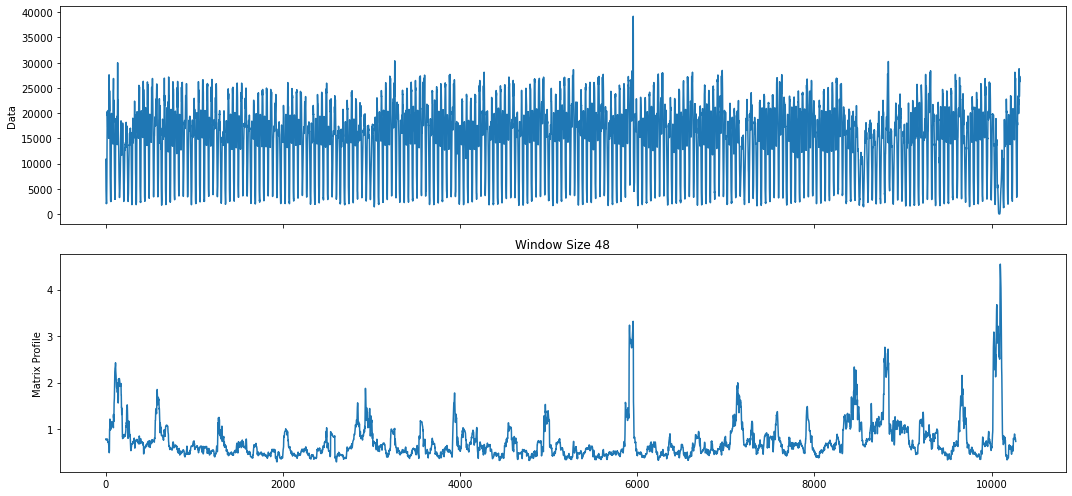

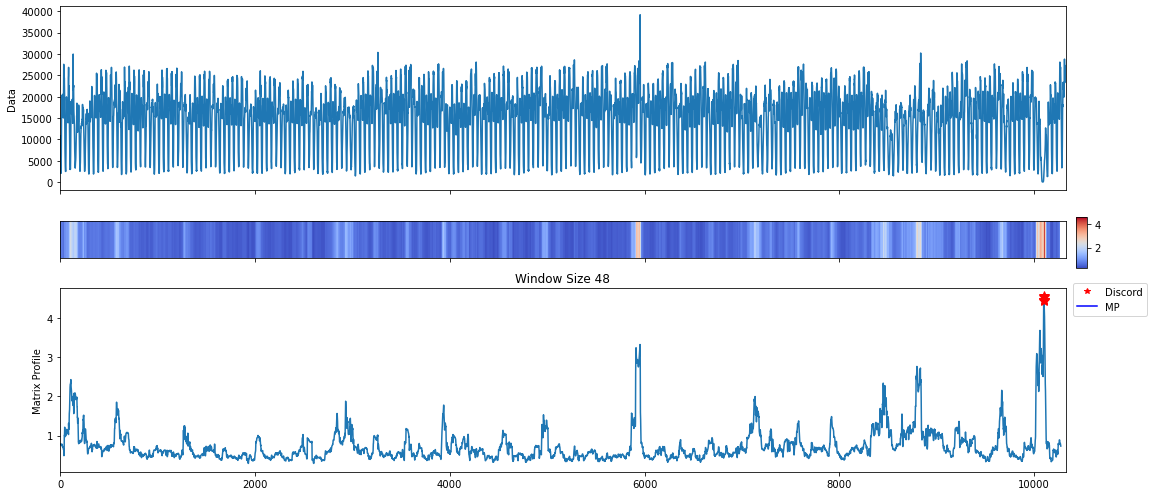

In [50]:
window_size = 48 # 30min intervals > To find daily events
profile = mp.compute(dataset['data'], windows=window_size)
profile = mp.discover.discords(profile, k = 5)

mp.visualize(profile)
plt.show()

In [45]:
for dt in dataset['datetime'][profile['discords']]:
    print(dt)

2015-01-27T09:00:00
2015-01-27T08:30:00
2015-01-27T08:00:00
2015-01-27T09:30:00
2015-01-27T10:00:00


# Discord Discovery Tuning

In [46]:
profile = mp.discover.discords(profile, exclusion_zone=window_size, k = 10)

In [47]:
from matrixprofile.visualize import plot_discords_mp

C:\ProgramData\Anaconda3\lib\site-packages\matrixprofile\visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


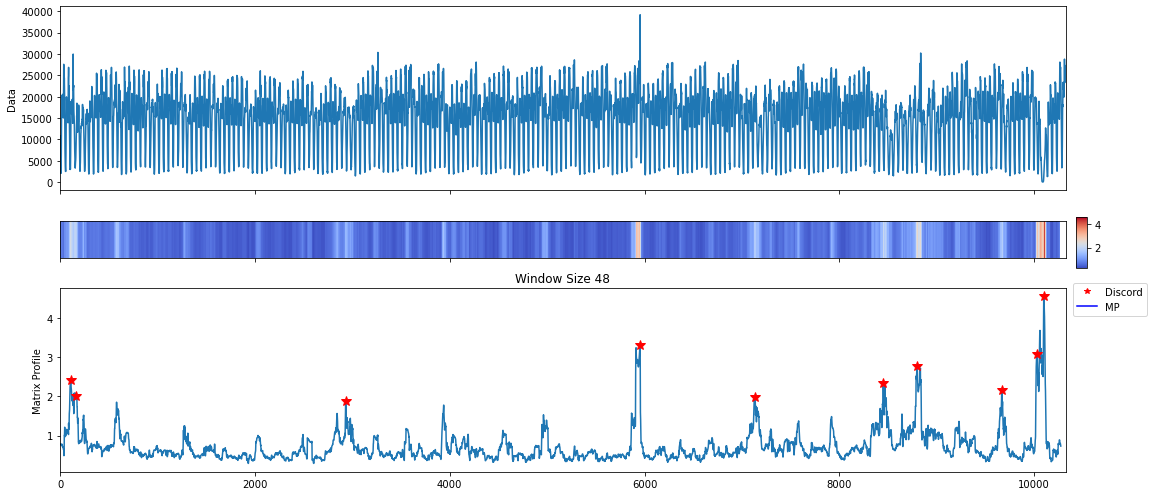

In [48]:
plot_discords_mp(profile)
plt.show()

In [43]:
for dt in dataset['datetime'][profile['discords']]:
    print(dt)

2015-01-27T09:00:00
2014-11-02T00:30:00
2015-01-25T20:30:00
2014-12-31T05:30:00
2014-07-03T07:00:00
2014-12-24T00:30:00
2015-01-18T09:00:00
2014-07-04T07:00:00
2014-11-26T15:00:00
2014-08-31T01:30:00


### 2015-01-27: Snowstorm
### 2014-11-03: New York marathon
### 2015-01-25: Snowstorm
### 2014-12-31: Happy New Year
### 2014-12-24: Christmas eve
### 2015-01-18: Black ice-related accidents
### 2014-07-04: Independence day
### 2014-11-26: Protesting Ferguson Decision Block Traffic